# Fashion MNIST

In [2]:
from minisom import MiniSom
from keras.datasets import fashion_mnist
import numpy as np

In [3]:
# Loading and preparing the dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# convert from integers to floats (X)
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# flatten attribute arrays
train_norm_flat = train_norm.reshape(60000, 784)
test_norm_flat = test_norm.reshape(10000, 784)

In [4]:
train_norm_flat.shape

(60000, 784)

In [5]:
# Initialization and training
n_neurons = 32
m_neurons = 32
som = MiniSom(n_neurons, m_neurons, test_norm_flat.shape[1], sigma=5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.pca_weights_init(test_norm_flat)
som.train(test_norm_flat, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 4.591981359067899


In [6]:
som.topographic_error(test_norm_flat[:100])

0.01

In [7]:
target = testY
label_names = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 556.71it/s]


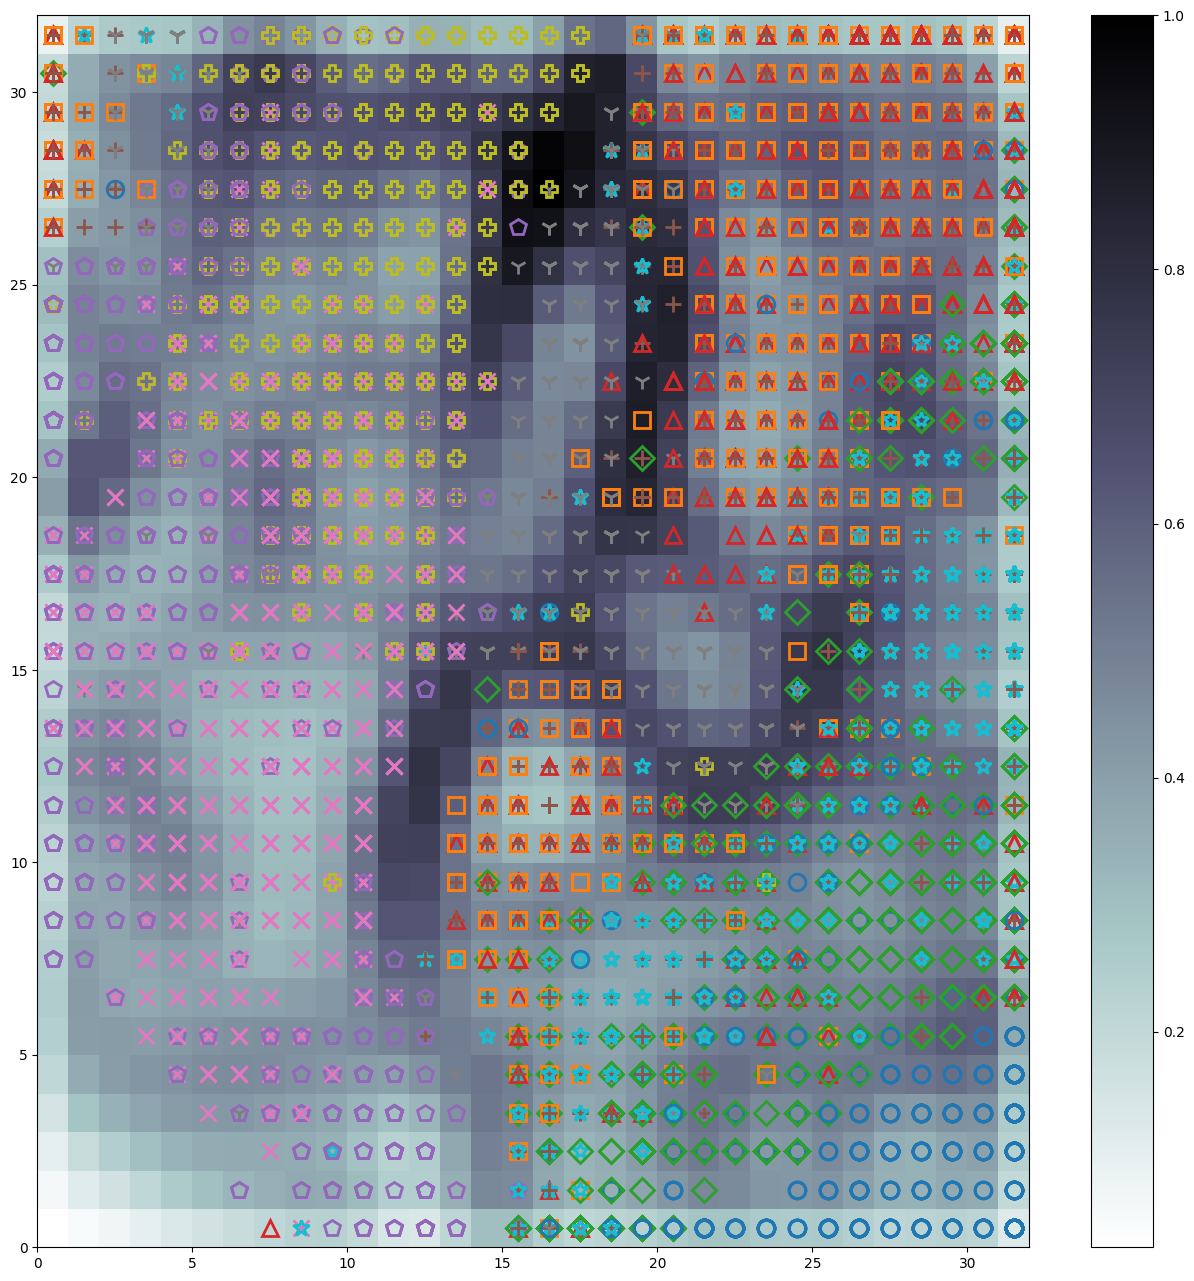

In [17]:
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

plt.figure(figsize=(16, 16))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D', '^', 'p', '+', 'x', '1', 'P', '*']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for cnt, xx in enumerate(tqdm(test_norm_flat)):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

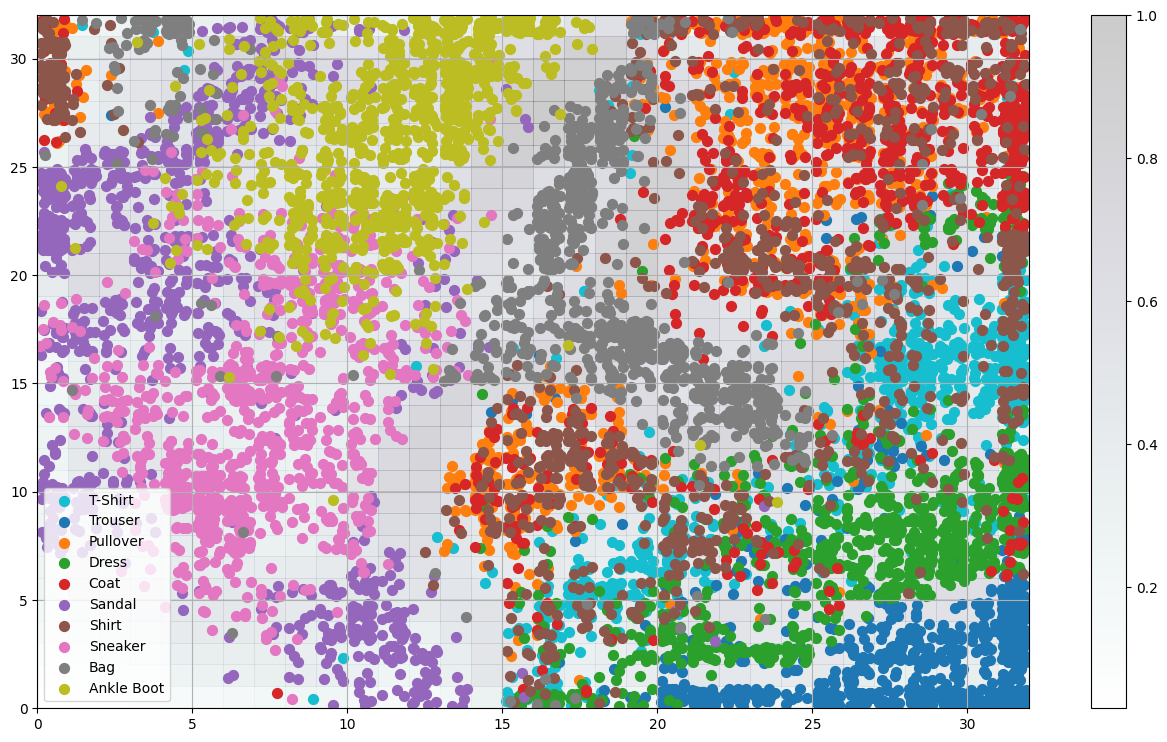

In [18]:
w_x, w_y = zip(*[som.winner(d) for d in test_norm_flat])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(16, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='lower left')
plt.grid()
plt.show()

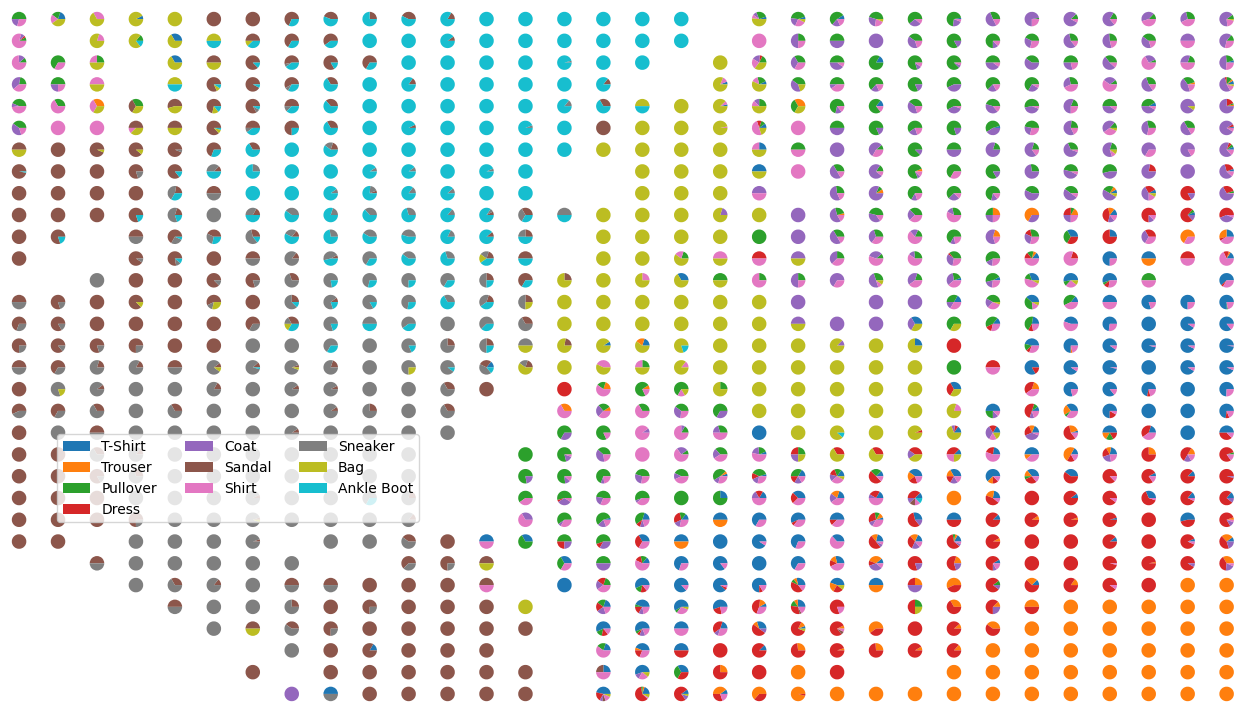

In [19]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(test_norm_flat, [label_names[t] for t in target])

fig = plt.figure(figsize=(16, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(-5, 2), ncol=3)
plt.show()

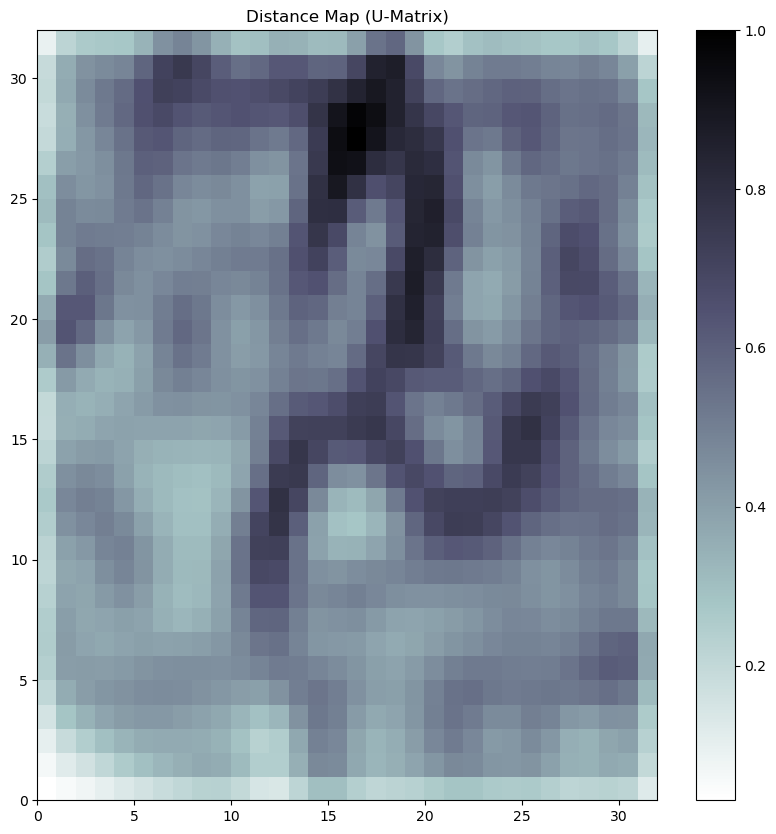

In [8]:
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
plt.colorbar()  # to show the legend
plt.title("Distance Map (U-Matrix)")
plt.show()

ValueError: data and labels must have the same length.

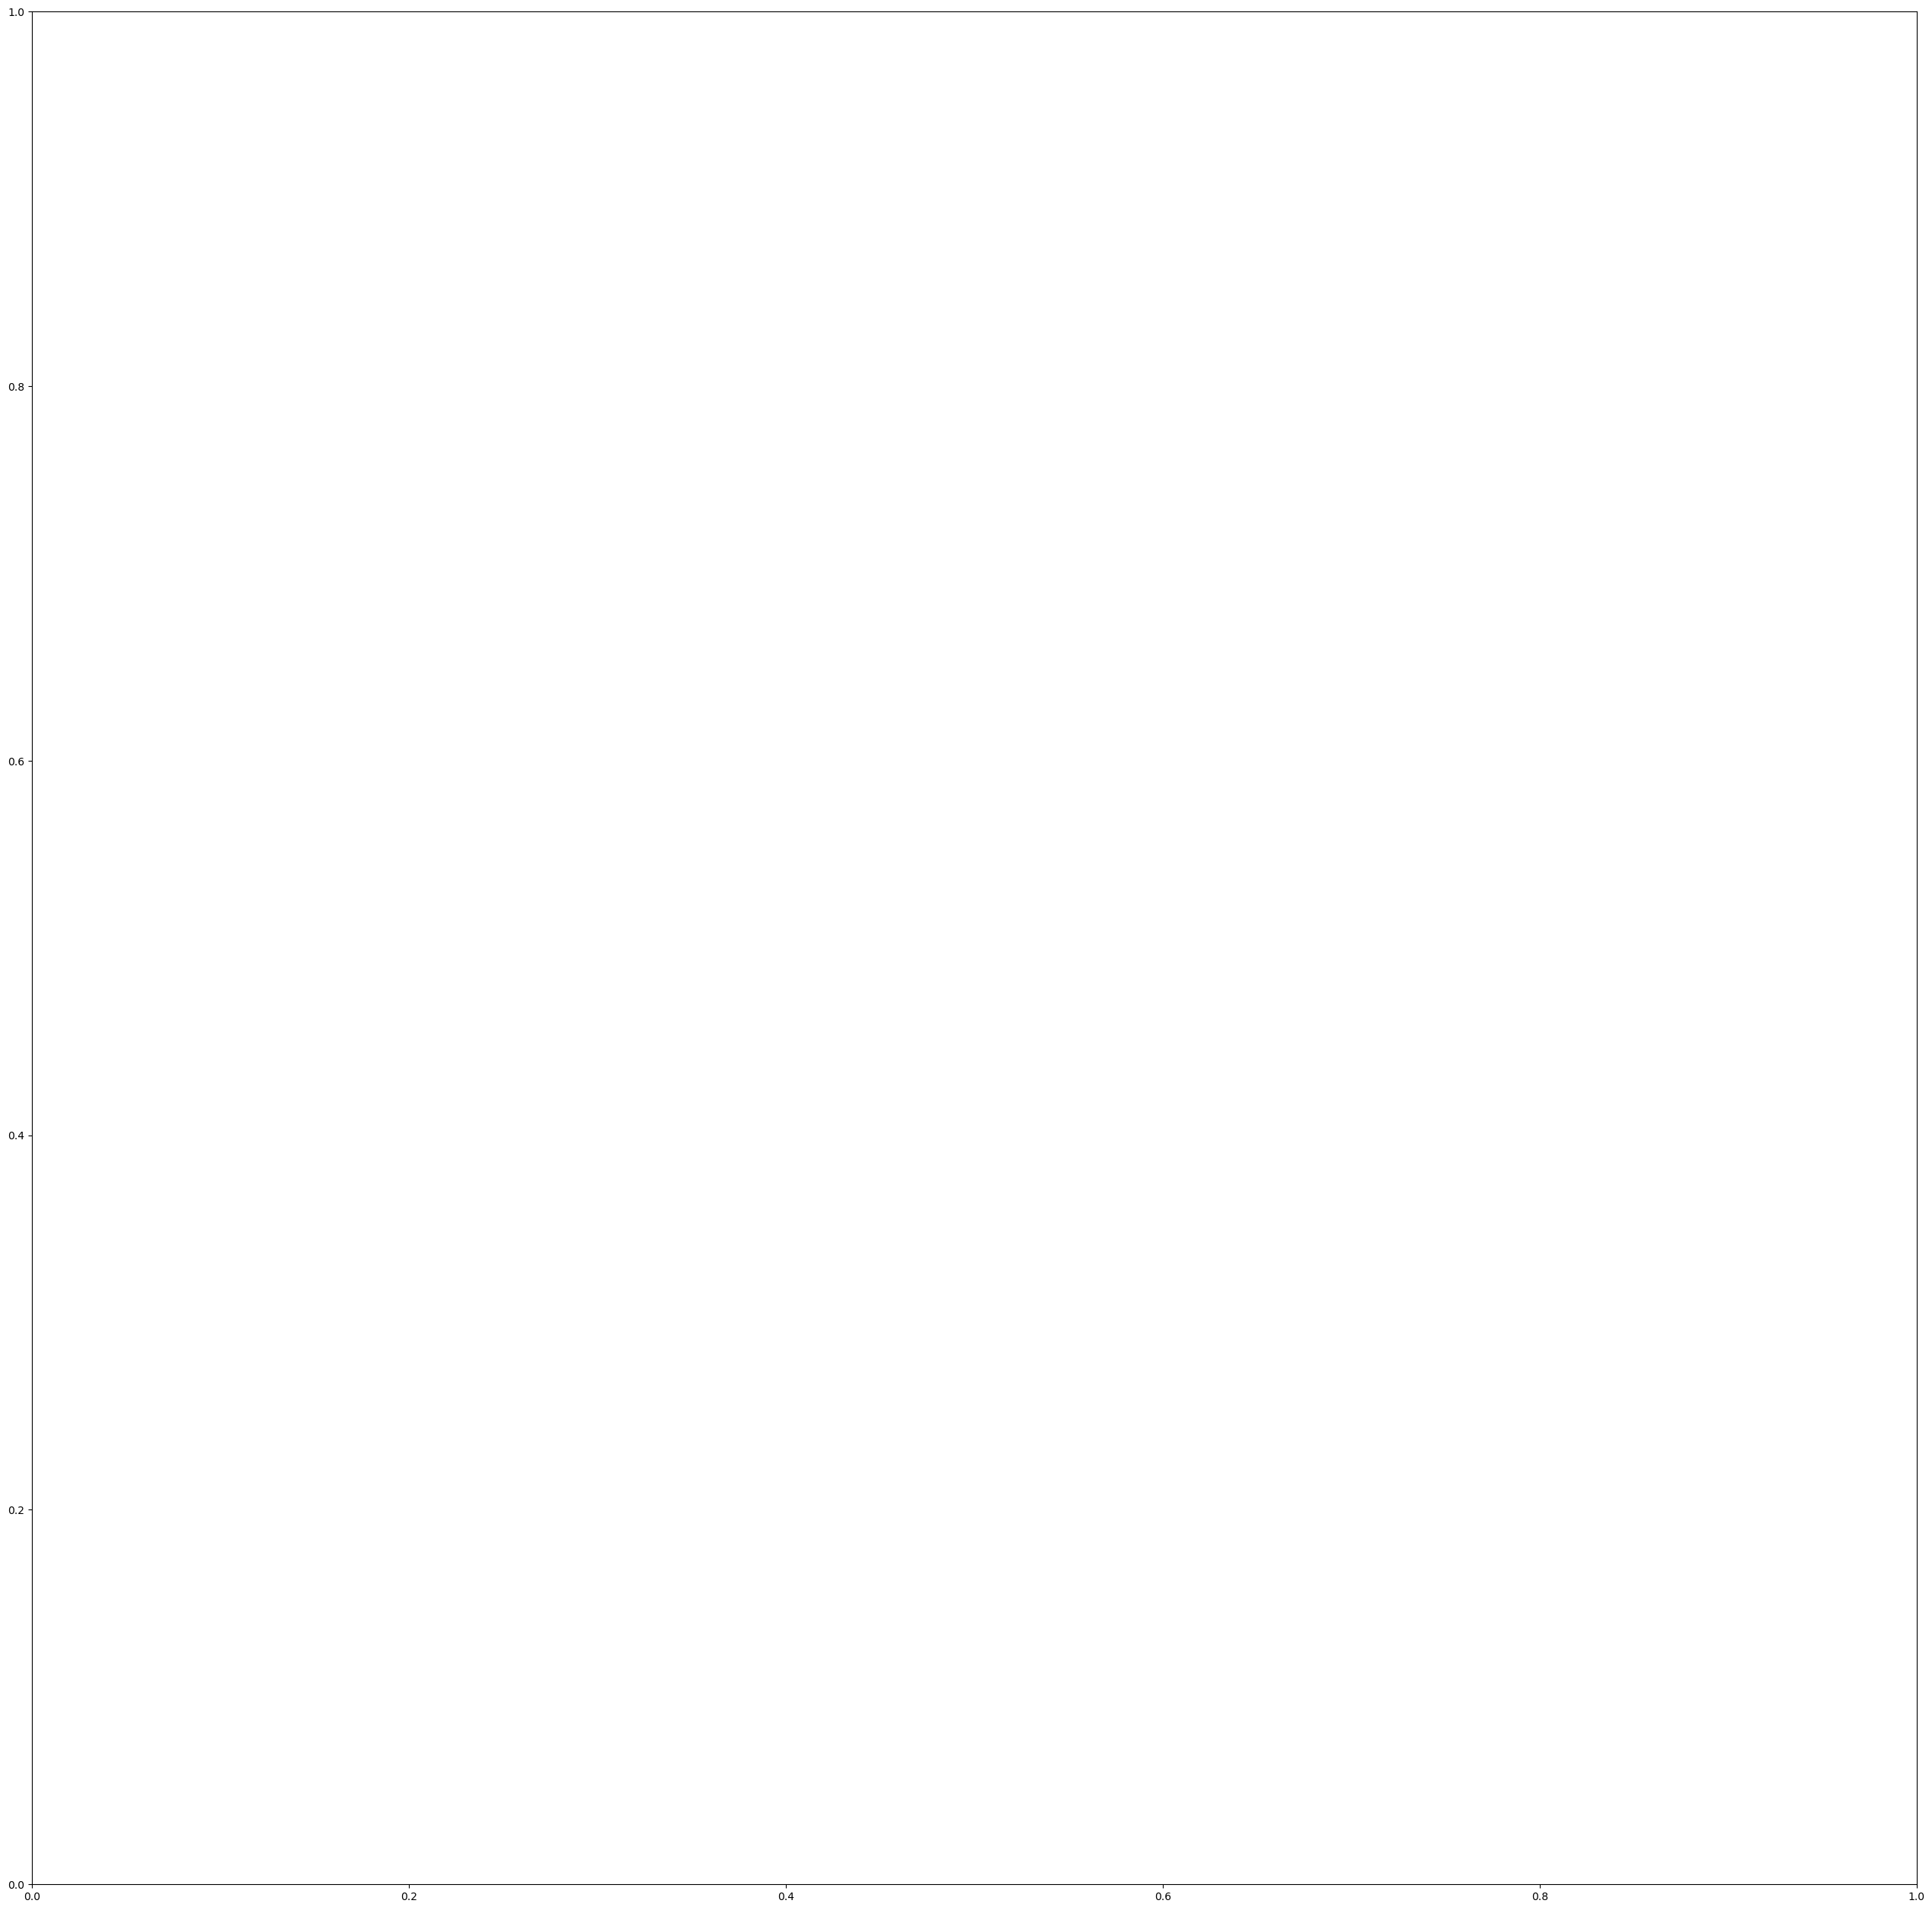

In [14]:
from matplotlib.gridspec import GridSpec
# ... (other imports)
# Assuming other parts of the code are correct and 'n_neurons' is defined
fig, ax = plt.subplots(figsize=(n_neurons, m_neurons))
the_grid = GridSpec(n_neurons, m_neurons)

labels_map = som.labels_map(train_norm_flat, target)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in range(10)]
    plt.subplot(the_grid[n_neurons-1-position[1], position[0]], aspect=1)
    plt.pie(label_fracs, colors=colors)

plt.title("Labels Pie Chart")
plt.show()


<Figure size 1000x1000 with 0 Axes>

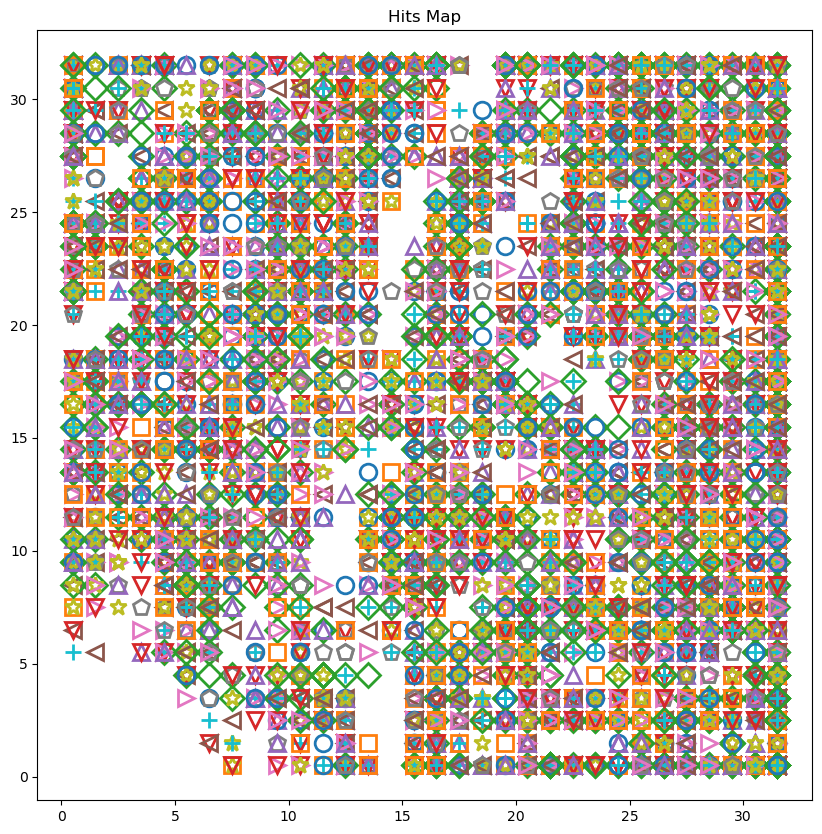

In [12]:
plt.figure(figsize=(10, 10))
# Correct the markers and colors indexing by subtracting 1 because the labels in 'target' are not zero-indexed
markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p', '*', '+', 'x']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

plt.figure(figsize=(10, 10))
for cnt, xx in enumerate(train_norm_flat):
    w = som.winner(xx)  # getting the winner
    # Make sure that the indexing of target is within the bounds
    if cnt < len(target):
        plt.plot(w[0] + .5, w[1] + .5, markers[target[cnt]], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)
plt.title("Hits Map")
plt.show()

